# IMBD Sentiment Analysis

## Import libraries

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation
import warnings

warnings.filterwarnings("ignore")

## Import and split dataset

In [175]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz", seed = 58)

## Exploratory data analysis

In [176]:
print("Y train values", np.unique(Y_train))
print("Y test values", np.unique(Y_test))

Y train values [0 1]
Y test values [0 1]


In [177]:
unique, counts = np.unique(Y_train, return_counts = True)
print("Y_train distribution", dict(zip(unique, counts)))
unique, counts = np.unique(Y_test, return_counts = True)
print("Y_test distribution", dict(zip(unique, counts)))

Y_train distribution {0: 12500, 1: 12500}
Y_test distribution {0: 12500, 1: 12500}


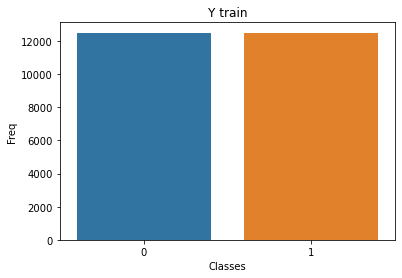

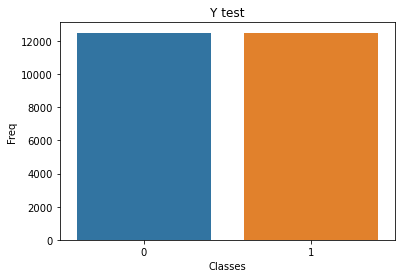

In [178]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test");

In [179]:
print("Type of data", type(X_train[0][0]))

Type of data <class 'int'>


In [180]:
review_len_train = []
review_len_test = []
for i, j in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))
print("Word count of X train", len(review_len_train))
print("Word count of X test", len(review_len_test))

Word count of X train 25000
Word count of X test 25000


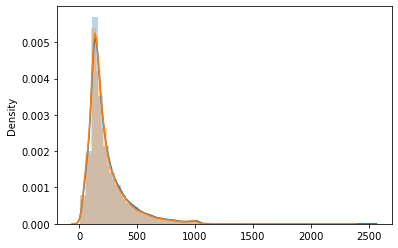

In [181]:
sns.distplot(review_len_train, hist_kws = {"alpha" : 0.3})
sns.distplot(review_len_test, hist_kws = {"alpha" : 0.3});

In [182]:
print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))


### Number of words

In [183]:
word_index = imdb.get_word_index()
len(word_index)

88584

In [184]:
for keys, values in word_index.items():
    if values == 58:
        print(keys)

my


In [185]:
def decoder(index = 24):
    reverse_index = dict([(value, key)for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

In [186]:
# Printing comment by index
decoded_review = decoder(0)

! i thought it was one of the best sequels i have seen in a while sometimes i felt as though i would just want someone to die stanley's killing off of the annoying characters was brilliant it was such a well done movie that you were happy when so and so died my only problem was in some scenes it looked like someone with a home camera was filming it and it was weird judd nelson is cute at least in my opinion and he was excellent in the role as stanley caldwell brilliant movie
1


## Preprocess

In [187]:
num_words = 15000

In [188]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words, seed = 58)

In [189]:
# Fix the word count to 150
maxlen = 150

X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [190]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   13
  197   12   16   31    7    4  118 2289   13   28  110   11    6  137
  518   13  421   17  151   13   62   43  181  294    8  783    2  880
  125    7    4  616  105   16  530   12   16  141    6   73  224   20
   15   25   71  654   54   38    5   38 1131   61   64  439   16   11
   49  139   12  610   40  294   19    6  344  370   16 1423   12    5
   12   16  916 6297 3249    9 1036   33  222   11   61  652    5   29
   16  321   11    4  217   17 3006    2  530   20]


In [191]:
decoded_review = decoder(0)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! i thought it was one of the best sequels i have seen in a while sometimes i felt as though i would just want someone to die ! killing off of the annoying characters was brilliant it was such a well done movie that you were happy when so and so died my only problem was in some scenes it looked like someone with a home camera was filming it and it was weird judd nelson is cute at least in my opinion and he was excellent in the role as stanley ! brilliant movie
1


## RNN

In [192]:
rnn = Sequential()

rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 32)           480000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [193]:
history = rnn.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
196/196 [==============================] - 6s 26ms/step - loss: 0.6723 - accuracy: 0.5859 - val_loss: 0.4846 - val_accuracy: 0.7986
Epoch 2/5
196/196 [==============================] - 5s 24ms/step - loss: 0.4683 - accuracy: 0.8191 - val_loss: 0.4225 - val_accuracy: 0.8152
Epoch 3/5
196/196 [==============================] - 5s 23ms/step - loss: 0.3574 - accuracy: 0.8504 - val_loss: 0.3881 - val_accuracy: 0.8301
Epoch 4/5
196/196 [==============================] - 5s 23ms/step - loss: 0.2951 - accuracy: 0.8814 - val_loss: 0.3820 - val_accuracy: 0.8360
Epoch 5/5
196/196 [==============================] - 5s 24ms/step - loss: 0.2538 - accuracy: 0.8987 - val_loss: 0.3625 - val_accuracy: 0.8512


In [194]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %", score[1]*100)

782/782 [==============================] - 3s 4ms/step - loss: 0.3625 - accuracy: 0.8512: 0s - loss: 0.3600 - accura - ETA: 0s - loss: 0.3606 - 
Accuracy: % 85.11599898338318


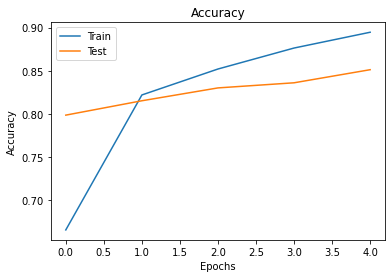

In [195]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], Label = "Test")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

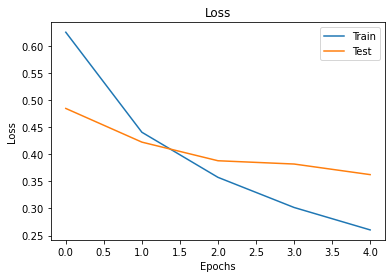

In [196]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], Label = "Test")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()